MOUNT GOOGLE **DRIVE**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/Drive", force_remount = True)

Mounted at /content/Drive


**IMPORTS**

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import os
import shutil
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

DATA PREPARATION




In [ ]:
# Unzip data to runtime
!unzip "./Drive/MyDrive/Disaster/damage.zip" -d "./"

Archive:  ./Drive/MyDrive/Disaster/damage.zip
   creating: ./damage/
   creating: ./damage/D0 level/
  inflating: ./damage/D0 level/06_02_0001.png  
  inflating: ./damage/D0 level/06_02_0002.png  
  inflating: ./damage/D0 level/06_02_0003.png  
  inflating: ./damage/D0 level/06_02_0004.png  
  inflating: ./damage/D0 level/06_02_0005.png  
  inflating: ./damage/D0 level/06_02_0006.png  
  inflating: ./damage/D0 level/06_02_0007.png  
  inflating: ./damage/D0 level/06_02_0008.png  
  inflating: ./damage/D0 level/06_02_0009.png  
  inflating: ./damage/D0 level/06_02_0010.png  
  inflating: ./damage/D0 level/06_02_0011.png  
  inflating: ./damage/D0 level/06_02_0012.png  
  inflating: ./damage/D0 level/06_02_0013.png  
  inflating: ./damage/D0 level/06_02_0014.png  
  inflating: ./damage/D0 level/06_02_0015.png  
  inflating: ./damage/D0 level/06_02_0016.png  
  inflating: ./damage/D0 level/06_02_0017.png  
  inflating: ./damage/D0 level/06_02_0018.png  
  inflating: ./damage/D0 level/06_0

In [ ]:
# Base Path for all files
data_dir = './damage'

In [ ]:
# Using ImageDataGenerator to load the Images for Training and Testing the CNN Model
datagenerator = {
    "train": ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1. / 255,
        validation_split=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rotation_range=30
    ).flow_from_directory(
        directory=data_dir,
        target_size=(300, 300),
        subset='training'
    ),

    "valid": ImageDataGenerator(
        rescale=1 / 255,
        validation_split=0.1
    ).flow_from_directory(
        directory=data_dir,
        target_size=(300, 300),
        subset='validation'
    )
}

Found 122 images belonging to 4 classes.
Found 12 images belonging to 4 classes.


BUILDING XCEPTION MODEL

Initializing Base Model

In [ ]:
# Initializing Xception (pretrained) model with input image shape as (300, 300, 3)
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(300, 300, 3)
)

# Setting the Training of all layers of Xception model to True
base_model.trainable = True

83683744/83683744 [==============================] - 1s 0us/step


Adding More Layers

In [ ]:
# Adding some more layers at the end of the Model as per our requirement
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax') # 2 Output Neurons for 2 Classes
])

Adam Optimizer

In [ ]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate = 1e-4)

# Compiling and setting the parameters we want our model to use
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=['accuracy']
)

In [ ]:
# Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 22,963,756
Trainable params: 22,909,228
Non-trainable params: 54,528
_______________________________________

Separation Train and Test Data

In [ ]:
# Setting variables for the model
batch_size = 64
epochs = 10

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
for i in os.listdir("/content/damage/"):
  print(len(os.listdir("/content/damage/" + i)))

38
40
35
21


In [ ]:
!rm -rf "/content/CNN-Models"

In [ ]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 1
validation_steps : 0


Training Model

In [ ]:
# Training the Model
history = model.fit_generator(
    generator=train_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
)

Epoch 1/10
1/1 [==============================] - 40s 40s/step - loss: 1.3726 - accuracy: 0.3125
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 1.3059 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.2778 - accuracy: 0.4615
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 1.2020 - accuracy: 0.5625
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.3125 - accuracy: 0.3462
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 1.0700 - accuracy: 0.5938
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 1.1273 - accuracy: 0.5625
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 1.0317 - accuracy: 0.5938
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.9687 - accuracy: 0.5625
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.8610 - accuracy: 0.8125


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
history_df = pd.DataFrame.from_dict(history.history)
history_df

,loss,accuracy
0,1.372575,0.312500
1,1.305946,0.500000
2,1.277812,0.461538
3,1.201995,0.562500
4,1.312528,0.346154
5,1.070003,0.593750
6,1.127324,0.562500
7,1.031672,0.593750
8,0.968748,0.562500
9,0.861019,0.812500


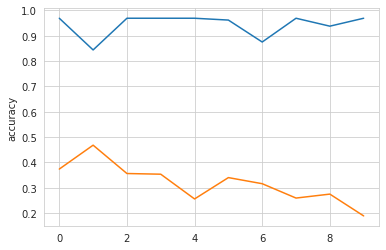

In [ ]:
sns.lineplot(x = history_df.index, y = history_df.accuracy)
sns.lineplot(x = history_df.index, y = history_df.loss)
plt.show()